<a href="https://colab.research.google.com/github/ivmtorres/AM-IA2021/blob/main/TPKalmanPto1yPto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importo las librerias que voy a utiliza np para matrices y plt para los graficos.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

##Importar archivos locales

In [2]:
#subimos el archivo de posicion
from google.colab import files
files.upload()

Saving posicion.dat to posicion.dat


{'posicion.dat': b'0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00\r\n-2.504231408238410950e+00 -1.569490623916499317e+01 3.945086878724396229e+01\r\n-1.010381195787340403e+01 -2.843151083309203386e+01 8.347097788378596306e+01\r\n-2.221278686635196209e+01 -3.864409956918098032e+01 1.317100292374379933e+02\r\n-3.824520135298371315e+01 -4.676695823553018272e+01 1.838177247922867537e+02\r\n-5.761510063614696264e+01 -5.323437262023799121e+01 2.394437664938159287e+02\r\n-7.973652993235737085e+01 -5.848062850954011083e+01 2.982378562875092030e+02\r\n-1.040235344637185335e+02 -6.294001169316470623e+01 3.598496961197815835e+02\r\n-1.298901594458147883e+02 -6.704680795711465180e+01 4.239289879351854324e+02\r\n-1.567504500979557633e+02 -7.123530308995395899e+01 4.901254336796700954e+02\r\n-1.840184516375884414e+02 -7.593978287884965539e+01 5.580887352996505797e+02\r\n-2.111082092840224504e+02 -8.159453311236575246e+01 6.274685947392135859e+02\r\n-2.374607113497331738e+

In [3]:
#subimos el archivo de velocidad
from google.colab import files
files.upload()

Saving velocidad.dat to velocidad.dat


{'velocidad.dat': b'2.387614226900041103e-01 -1.731881899095606059e+01 3.704948261368554085e+01\r\n-5.149565109074046632e+00 -1.414337445181723751e+01 4.179387195119875287e+01\r\n-9.951936859260968049e+00 -1.140221570047674504e+01 4.618796323431979545e+01\r\n-1.416835382795579790e+01 -9.095342736774000514e+00 5.023175646294748731e+01\r\n-1.779881601496163057e+01 -7.222755560768746363e+00 5.392525163710888592e+01\r\n-2.084332342044581310e+01 -5.784454172502591973e+00 5.726844875679307734e+01\r\n-2.330187604422826553e+01 -4.780438571917329682e+00 6.026134782208464458e+01\r\n-2.517447388650180073e+01 -4.210708759001136059e+00 6.290394883285262040e+01\r\n-2.646111694720457308e+01 -4.075264733841322595e+00 6.519625178920978215e+01\r\n-2.716180522622016724e+01 -4.374106496354215778e+00 6.713825669106881833e+01\r\n-2.727653872374503408e+01 -5.107234046590747312e+00 6.872996353846974671e+01\r\n-2.680531743963365443e+01 -6.274647384496347513e+00 6.997137233144167112e+01\r\n-2.587813261530851605

In [4]:
#subimos el archivo de aceleracion
from google.colab import files
files.upload()

Saving aceleracion.dat to aceleracion.dat


{'aceleracion.dat': b'-5.681303922581719235e+00 3.392587432921573054e+00 4.919538364774780348e+00\r\n-5.095349141004589910e+00 2.958301645239657773e+00 4.569240310317127296e+00\r\n-4.509394359383804840e+00 2.524015857543190577e+00 4.218942255855836265e+00\r\n-3.923439577798490063e+00 2.089730069832512527e+00 3.868644201398637961e+00\r\n-3.337484796222270234e+00 1.655444282146618207e+00 3.518346146944168140e+00\r\n-2.751530014618765563e+00 1.221158494445262477e+00 3.168048092488788825e+00\r\n-2.165575233077106532e+00 7.868727067316285684e-01 2.817750038015219616e+00\r\n-1.579620451477239840e+00 3.525869190334560699e-01 2.467451983563478279e+00\r\n-9.936656698737351689e-01 -8.169886866744491272e-02 2.117153929104460985e+00\r\n-4.077108882847824134e-01 -5.159846563683458953e-01 1.766855874647262681e+00\r\n1.782438933041703422e-01 -9.502704440692468779e-01 1.416557820186426397e+00\r\n7.641986748894851189e-01 -1.384556231767419376e+00 1.066259765731956577e+00\r\n9.320444829285747801e-01 -1.

In [5]:
#leemos el archivo de posicion
df_pos=pd.read_table(r'/content/posicion.dat',
names=['posX','posY','posZ'],sep=' ',encoding='utf-8')

In [6]:
#leemos el achivo de velocidad
df_vel=pd.read_table(r'/content/velocidad.dat',
names=['velX','velY','velZ'],sep=' ',encoding='utf-8')

In [7]:
#leemos el archivo de aceleracion
df_acel=pd.read_table(r'/content/aceleracion.dat',
names=['acelX','acelY','acelZ'],sep=' ',encoding='utf-8')

In [8]:
np_pos = df_pos.to_numpy() #convierto los valores de posición leido en el formato numpy

In [9]:
np_vel = df_vel.to_numpy() #convierto los valores de velocidad leido en el formato numpy

In [10]:
np_acel = df_acel.to_numpy() #convierto los valores de aceleración leido en el formato numpy

In [11]:
#armo las matrizes de posicion - velocidad - aceleracion sin ruido
np_pos_matrix=np.asmatrix(np_pos)
np_vel_matrix=np.asmatrix(np_vel)
np_acel_matrix=np.asmatrix(np_acel)
#defino la media y varianza del ruido
mu = 0 ; sigma = 10
#armo las matrizes de posicion - velocidad - aceleracion con ruido gaussiano
np_pos_matrix_noise_normal = np_pos_matrix + np.random.normal(mu, sigma, np_pos_matrix.shape)  
np_vel_matrix_noise_normal = np_vel_matrix + np.random.normal(mu, sigma, np_vel_matrix.shape)
np_acel_matrix_noise_normal = np_acel_matrix + np.random.normal(mu, sigma, np_acel_matrix.shape)
#armo las matrizes de posicion - velocidad - aceleracion con ruido uniforme
np_pos_matrix_noise_uniform = np_pos_matrix + np.random.uniform(size = np_pos_matrix.shape, low = 0, high = 1) 
np_vel_matrix_noise_uniform = np_vel_matrix + np.random.uniform(size = np_vel_matrix.shape, low = 0, high = 1)
np_acel_matrix_noise_uniform = np_acel_matrix + np.random.uniform(size = np_acel_matrix.shape, low = 0, high = 1)


In [12]:
#creo la matriz de estados que es el data set sin ruido ---->este es el que vamos a utilizar
x_estado_medidos = np.concatenate((np_pos_matrix,np_vel_matrix,np_acel_matrix),axis=1)

In [13]:
#data set con valores medidos sin ruido ----> Si los usamos
x_estado_medidos.shape

(351, 9)

In [14]:
#creo la matriz de estados que es el data set con ruido normal ---> esto NO lo vamos a utilizar
x_estado_medidos_noise_normal = np.concatenate((np_pos_matrix_noise_normal,np_vel_matrix_noise_normal,np_acel_matrix_noise_normal),axis=1)

In [15]:
#data set con valores medidos con ruido ---> No lo usamos
x_estado_medidos_noise_normal.shape

(351, 9)

In [16]:
#creo la matriz de estados que es el data set con ruido uniforme ---> esto NO lo vamos a utilizar
x_estado_medidos_noise_uniform = np.concatenate((np_pos_matrix_noise_uniform,np_vel_matrix_noise_uniform,np_acel_matrix_noise_uniform),axis=1)

In [17]:
x_estado_medidos_noise_uniform.shape

(351, 9)

In [18]:
#creo el vector de estado inicial
x_estado_estimado_inicial = np.array([10.7533,36.6777,-45.1769,1.1009,-17.0,35.7418,-5.7247,3.4268,5.2774])

In [19]:
#vector de estado estimado inicial
x_estado_estimado_inicial.shape

(9,)

In [20]:
#creo la matriz de p de error de proceso
p_covarianza_estimado_inicial_diagonal=np.array([100,100,100,1,1,1,0.01,0.01,0.01])
p_covarianza_estimado_inicial = np.diag(p_covarianza_estimado_inicial_diagonal)

In [21]:
#covarianza estimado inicial
p_covarianza_estimado_inicial.shape

(9, 9)

In [22]:
#creo la matriz q 
q_covarianza_ruido_planta_diagonal=np.array([0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3])
q_covarianza_ruido_planta = np.diag(q_covarianza_ruido_planta_diagonal)

In [23]:
#covarianza ruido de planta
q_covarianza_ruido_planta.shape

(9, 9)

In [24]:
#creo la matriz r
epx=10; epy=10; epz=10
r_covarianza_medicion=np.array([epx**2,epy**2,epz**2])
r_covarianza_ruido_medicion = np.diag(r_covarianza_medicion)

In [25]:
#tiempo - intervalo de muestreo ---> Para el TP se plantea 1 segundo.
h_tiempo_muestreo=1
#termino - primer derivada
h_intervalo_tiempo = h_tiempo_muestreo
#termino - segunda derivada
h_intervalo_tiempo2 = (0.5*(h_tiempo_muestreo**2))

In [26]:
#genero una matriz de identidad base de dimension 3x3
matriz_indentidad_dim3 = np.identity(3)
#genero una matriz nula base de dimension 3x3
matriz_zeros_dim3 = np.zeros((3,3))


In [27]:
#genero matriz de transicion
#armo la matriz por filas
#primero la fila posicion
f_matriz_transicion_fila_pos = np.concatenate((matriz_indentidad_dim3,h_intervalo_tiempo*matriz_indentidad_dim3,h_intervalo_tiempo2*matriz_indentidad_dim3),axis=1)
#segundo la fila velocidad
f_matriz_transicion_fila_vel = np.concatenate((matriz_zeros_dim3,matriz_indentidad_dim3,h_intervalo_tiempo*matriz_indentidad_dim3),axis=1)
#tercero la fila aceleracion
f_matriz_transicion_fila_acel = np.concatenate((matriz_zeros_dim3,matriz_zeros_dim3,h_intervalo_tiempo*matriz_indentidad_dim3),axis=1)
#armo la matriz de transicion completa 
f_matriz_transicion = np.concatenate((f_matriz_transicion_fila_pos,f_matriz_transicion_fila_vel,f_matriz_transicion_fila_acel),axis=0)

In [28]:
#genero la matriz de observacion
h_matriz_observacion = np.concatenate((matriz_indentidad_dim3,matriz_zeros_dim3,matriz_zeros_dim3), axis=1)

In [29]:
#muestro la dimensión de la matriz h
h_matriz_observacion.shape

(3, 9)

In [40]:
#inicializo la matriz de mediciones afectada por el ruido gaussiano
# z_observaciones_noise = np.asmatrix(h_matriz_observacion.dot(np.transpose(x_estado_medidos[0,:]))+np.random.normal(mu, sigma, size=(3,1)))  
# z_observaciones_noise.shape
# contador = 1
# #las observaciones son la matriz de estados con el ruido gaussiano para el punto 1
# for x_estado in x_estado_medidos[1:,:]:
#   contador = contador + 1
#   z_observaciones_noise_fila = np.asmatrix(h_matriz_observacion.dot(np.transpose(x_estado))+np.random.normal(mu, sigma, size=(3,1)))
#   z_observaciones_noise = np.concatenate((z_observaciones_noise,z_observaciones_noise_fila),axis=1)
#******************************************************************************************************************************
#*********************Para trabajar con ruido uniforme armamos la matriz de observacion sumandole ruido uniforme***************
#******************************************************************************************************************************
#inicializo la matriz de mediciones afectada por el ruido uniforme

z_observaciones_noise = np.asmatrix(h_matriz_observacion.dot(np.transpose(x_estado_medidos[0,:]))+np.random.uniform(size = (3,1), low = -17.32, high = 17.32))  
z_observaciones_noise.shape
contador = 1
#las observaciones son la matriz de estados con el ruido gaussiano para el punto 1
for x_estado in x_estado_medidos[1:,:]:
  contador = contador + 1
  z_observaciones_noise_fila = np.asmatrix(h_matriz_observacion.dot(np.transpose(x_estado))+np.random.uniform(size = (3,1), low = -17.32, high = 17.32))
  z_observaciones_noise = np.concatenate((z_observaciones_noise,z_observaciones_noise_fila),axis=1)

In [41]:
contador #verifico que se cuenten correctamente todos los valores medidos

351

In [42]:
z_observaciones_noise.shape #verifico la forma de la matriz z de observaciones

(3, 351)

In [43]:
z_observaciones_noise[:,0:3] #verifico los datos en la matriz ruidosa

matrix([[-13.83844184, -17.26010451,   1.29178826],
        [  1.1943445 , -32.85447264, -12.13993033],
        [ 14.40475475,  55.95603602,  97.62954921]])

In [44]:
from numpy.linalg import inv #agrego la función inversa

In [45]:
#realizo la operación de iteracion para leer los valores y cargar la actualización del vector de estado
xpriori = x_estado_estimado_inicial
ppriori = p_covarianza_estimado_inicial
contador = 0
mediciones = []
predicciones = []
estimaciones = []
#proceso de iteración sobre los datos.
for z_medida_noise in np.transpose(z_observaciones_noise):
  #armo el lazo de iteracion
  contador = contador + 1
  #realizo la estimacion de x1/0 con el vector de estado incial
  x1brr0=f_matriz_transicion.dot(xpriori)
  #realizo la estimacion de p1/0 con la matriz de covarianza inicial
  p1brr0=f_matriz_transicion.dot(ppriori).dot(np.transpose(f_matriz_transicion))+q_covarianza_ruido_planta
  #realizo el calculo de S
  s1 = h_matriz_observacion.dot(p1brr0).dot(np.transpose(h_matriz_observacion))+r_covarianza_ruido_medicion
  #realizo el calculo de k
  k1= p1brr0.dot(np.transpose(h_matriz_observacion)).dot(inv(s1))

  #calculo delta medida de innovacion
  delta1 = np.asarray(z_medida_noise).flatten()-h_matriz_observacion.dot(x1brr0)
  # #actualizo el valor de x
  x1brr1 = x1brr0 + k1.dot(delta1)
  # #actualizo el valor de p
  p1brr1 = (np.identity(len(k1))-k1.dot(h_matriz_observacion)).dot(p1brr0)
  #cargo los datos para evaluacion posterior
  mediciones.append(np.asarray(z_medida_noise).flatten())
  predicciones.append(x1brr0)
  estimaciones.append(x1brr1)
  # #convierto el estado actual en el estado previo
  xpriori = x1brr1
  ppriori = p1brr1
  

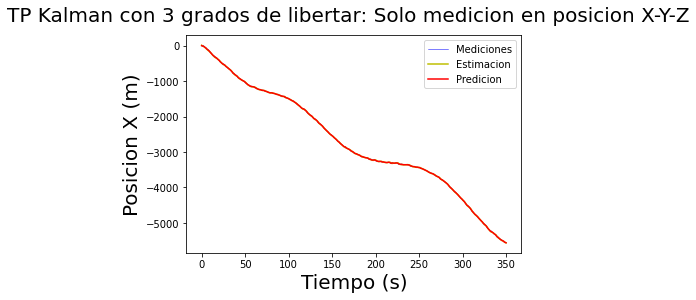

In [46]:
#grafico el eje X
t = np.arange(0, 351, h_tiempo_muestreo)
fig = plt.figure()
fig.suptitle('TP Kalman con 3 grados de libertar: Solo medicion en posicion X-Y-Z', fontsize=20)
plt.plot(t, np.asarray(mediciones)[:,0], label='Mediciones', color='b',linewidth=0.5)
plt.plot(t, np.asarray(predicciones)[:,0], label='Estimacion', color='y', linewidth=1.5)
plt.plot(t, np.asarray(estimaciones)[:,0], label='Predicion', color='r', linewidth=1.5)
plt.xlabel('Tiempo (s)', fontsize=20)
plt.ylabel('Posicion X (m)', fontsize=20)
plt.legend()
plt.show()

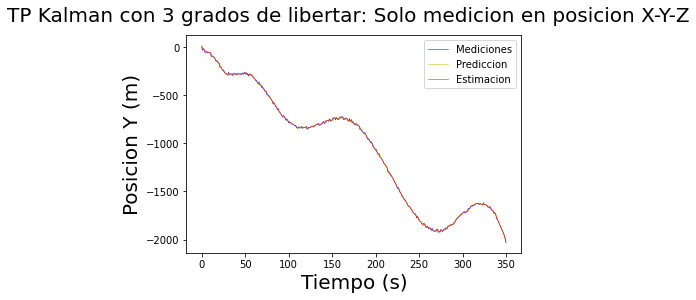

In [47]:
#grafico el eje y
t = np.arange(0, 351, h_tiempo_muestreo)
fig = plt.figure()
fig.suptitle('TP Kalman con 3 grados de libertar: Solo medicion en posicion X-Y-Z', fontsize=20)
plt.plot(t, np.asarray(mediciones)[:,1], label='Mediciones', color='b',linewidth=0.5)
plt.plot(t, np.asarray(predicciones)[:,1], label='Prediccion', color='y', linewidth=0.5)
plt.plot(t, np.asarray(estimaciones)[:,1], label='Estimacion', color='r', linewidth=0.5)
plt.xlabel('Tiempo (s)', fontsize=20)
plt.ylabel('Posicion Y (m)', fontsize=20)
plt.legend()
plt.show()

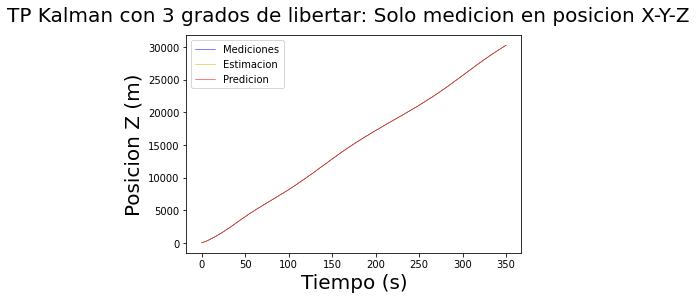

In [48]:
#grafico el eje z
t = np.arange(0, 351, h_tiempo_muestreo)
fig = plt.figure()
fig.suptitle('TP Kalman con 3 grados de libertar: Solo medicion en posicion X-Y-Z', fontsize=20)
plt.plot(t, np.asarray(mediciones)[:,2], label='Mediciones', color='b',linewidth=0.5)
plt.plot(t, np.asarray(predicciones)[:,2], label='Estimacion', color='y', linewidth=0.5)
plt.plot(t, np.asarray(estimaciones)[:,2], label='Predicion', color='r', linewidth=0.5)
plt.xlabel('Tiempo (s)', fontsize=20)
plt.ylabel('Posicion Z (m)', fontsize=20)
plt.legend()
plt.show()

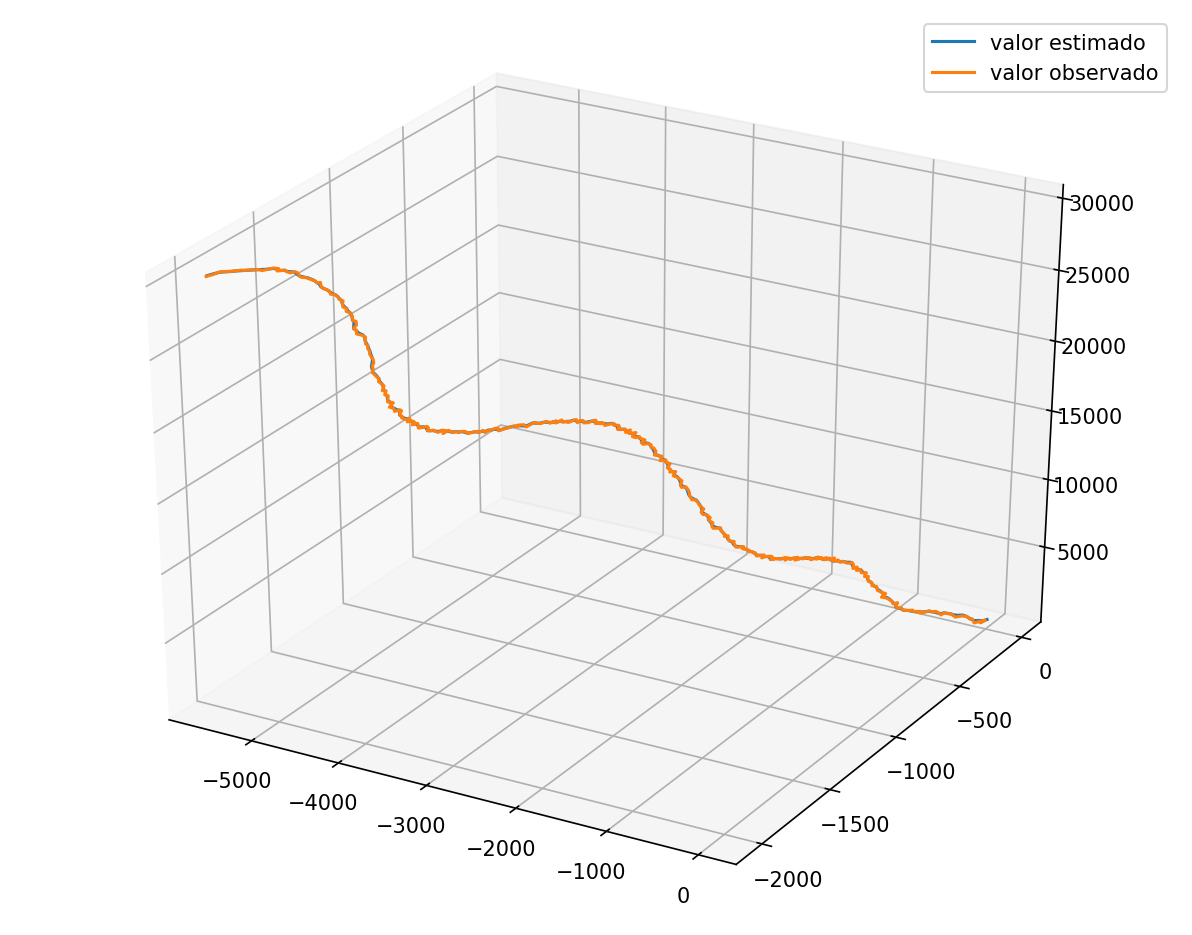

In [49]:
#grafico la trayectoria
fig = plt.figure(figsize=(10,8), dpi= 150)
ax = fig.gca(projection='3d')
ax.plot( np.asarray(estimaciones)[:,0],  np.asarray(estimaciones)[:,1], np.asarray(estimaciones)[:,2], label='valor estimado')
ax.plot(np.asarray(mediciones)[:,0], np.asarray(mediciones)[:,1], np.asarray(mediciones)[:,2], label='valor observado')
ax.legend()
plt.show()

